## Import Library

In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter

plt.style.use('bmh'); sns.set()

# Baca Data

In [ ]:
# input data jual rumah di Lampung
lampung = pd.read_csv('https://raw.githubusercontent.com/ttodasi/DatMin-Project-Rumah-Kelompok-9/main/9.csv')

In [ ]:
# melihat jumlah baris dan kolom pada data
N, P = lampung.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 100, ', Kolom = ', 18)

In [ ]:
# mengintip beberapa data awal
lampung.head()

,No,Tgl_Iklan,url,harga,kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi,Unnamed: 17
0,1,28/12/2016,https://www.rumah123.com/properti/bandar-lampu...,3500.0,Bandar Lampung,220,216,4.0,3.0,1,1,2,1,4400.0,SHM,RUMAH MEWAH DI PERUMAHAN KOTA BANDAR LAMPUNG,PERUM CITRA GARDEN CLUSTER VERSAILES TYPE CORS...,NaN
1,2,18/9/2018,https://www.rumah123.com/properti/bandar-lampu...,1500.0,Bandar Lampung,380,200,3.0,4.0,2,0,0,0,1300.0,SHM,Rumah asri di Way Halim Sepang Jaya siap huni,dijual cepat rumah di way halim sepang Jaya\nL...,NaN
2,3,20/9/2018,https://www.rumah123.com/properti/bandar-lampu...,1900.0,Bandar Lampung,160,155,3.0,3.0,1,1,1,1,2200.0,SHM,Rumah Minimalis 2 lantai di Perumahan Citra Ga...,Luas Tanah:160\nLuas Bangunan: 155\nKamar Tidu...,NaN
3,4,21/9/2018,https://www.rumah123.com/properti/bandar-lampu...,2350.0,Bandar Lampung,160,189,3.0,2.0,1,1,0,0,2200.0,SHM,"RUMAH NYAMAN PERUM CITRA GARDEN , TELUK BETUNG...",LT / LB : 160 m2 / 189 m2\n2 Lantai\n2.200 Wat...,NaN
4,5,23/10/2018,https://www.rumah123.com/properti/bandar-lampu...,1400.0,Bandar Lampung,1036,243,5.0,3.0,0,0,0,2,1300.0,SHM,"RUMAH HALAMAN LUAS JLN. PULAU TIODORE , JAGABA...",LT : 1036 M2 \nLB : 243 M2 \n1 LANTAI\n5 KMAR ...,NaN


# Mengoreksi Tipe variabel

In [ ]:
# tipe data di setiap kolom
lampung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           100 non-null    int64  
 1   Tgl_Iklan    100 non-null    object 
 2   url          100 non-null    object 
 3   harga        100 non-null    float64
 4   kota         100 non-null    object 
 5   LT           100 non-null    int64  
 6   LB           100 non-null    int64  
 7   KT           99 non-null     float64
 8   KM           99 non-null     float64
 9   KTP          100 non-null    int64  
 10  KMP          100 non-null    int64  
 11  carport      100 non-null    int64  
 12  garasi       100 non-null    int64  
 13  listrik      97 non-null     float64
 14  surat        100 non-null    object 
 15  judul        100 non-null    object 
 16  deskripsi    100 non-null    object 
 17  Unnamed: 17  1 non-null      object 
dtypes: float64(4), int64(7), object(7)
memory usage: 14

In [ ]:
# Remove baris No, kota karena datanya seragam sehingga tidak mempengaruhi dalam preprocessing
# Remove baris 'Unnamed: 17' karena tidak ada isi datanya
# Remove baris judul, deskripsi, url karena datanya beragam dan tidak mempengaruhi dalam preprocessing
lampung.drop(["No", "kota", "Unnamed: 17", "judul", "deskripsi", "url"], axis=1, inplace=True)

In [ ]:
# Menyesuaikan tipe variabel
lampung['Tgl_Iklan']= pd.to_datetime(lampung['Tgl_Iklan'])
lampung['surat'] = lampung['surat'].astype('category')
lampung.dtypes

Tgl_Iklan    datetime64[ns]
harga               float64
LT                    int64
LB                    int64
KT                  float64
KM                  float64
KTP                   int64
KMP                   int64
carport               int64
garasi                int64
listrik             float64
surat              category
dtype: object

# Cek Data yang Terdapat Duplikasi

In [ ]:
print(lampung.duplicated().sum())
print(lampung.shape) # re-check by printing data size

0
(100, 12)


# Seleksi Variabel

In [ ]:
# Memilih hanya variable numerik
lampung_num = lampung.select_dtypes(include = ['float64', 'int64'])
lampung_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,3500.0,220,216,4.0,3.0,1,1,2,1,4400.0
1,1500.0,380,200,3.0,4.0,2,0,0,0,1300.0
2,1900.0,160,155,3.0,3.0,1,1,1,1,2200.0
3,2350.0,160,189,3.0,2.0,1,1,0,0,2200.0
4,1400.0,1036,243,5.0,3.0,0,0,0,2,1300.0


In [ ]:
# Memilih hanya variable kategorik
lampung_cat = lampung.select_dtypes(include = ['category'])
lampung_cat.head()

,surat
0,SHM
1,SHM
2,SHM
3,SHM
4,SHM


# Dasar Pengolahan variabel Kategorik: Dummy Variable

In [ ]:
df = pd.get_dummies(lampung['surat'], prefix='sertifikat')
df.head()

,sertifikat_AJB,sertifikat_SHGB,sertifikat_SHM
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


# Menggabungkan dengan data awal (concat)

In [ ]:
df2 = pd.concat([lampung, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Tgl_Iklan,2016-12-28 00:00:00,2018-09-18 00:00:00,2018-09-20 00:00:00,2018-09-21 00:00:00,2018-10-23 00:00:00
harga,3500,1500,1900,2350,1400
LT,220,380,160,160,1036
LB,216,200,155,189,243
KT,4,3,3,3,5
KM,3,4,3,2,3
KTP,1,2,1,1,0
KMP,1,0,1,1,0
carport,2,0,1,0,0
garasi,1,0,1,0,2


#Outliers

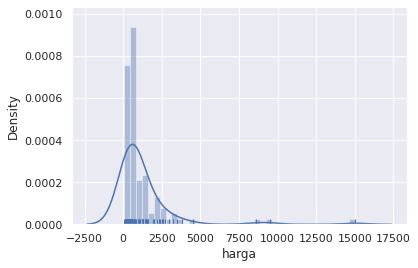

In [ ]:
# Distribusi
p = sns.distplot(lampung['harga'], kde=True, rug=True)

In [ ]:
# menggunakan 95% confidence interval di sekitar variabel "harga"
df = np.abs(lampung.harga - lampung.harga.mean())<=(2*lampung.harga.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(100,)


0    True
1    True
2    True
3    True
4    True
Name: harga, dtype: bool

In [ ]:
lampung2 = lampung[df] # Data tanpa outliers
print(lampung2.shape) # cek size data sekarang

(97, 12)


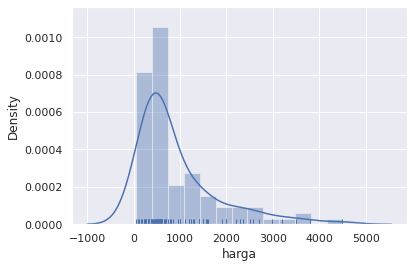

In [ ]:
# Distribusi tanpa outliers
p = sns.distplot(lampung2['harga'], kde=True, rug=True)

# Missing Values

In [ ]:
# Mengecek ada/tidaknya Missing Values
print(lampung2.isnull().sum())

Tgl_Iklan    0
harga        0
LT           0
LB           0
KT           1
KM           1
KTP          0
KMP          0
carport      0
garasi       0
listrik      3
surat        0
dtype: int64


In [ ]:
lampung2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
lampung2.dropna(inplace=True) # inplace=True if really really sure

# Statistika Deskriptif

In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
lampung2.describe()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,939.499468,244.446809,151.723404,3.670213,2.446809,0.138298,0.074468,1.319149,0.351064,1693.085106
std,892.372879,340.262884,144.588954,2.833700,1.732777,0.404306,0.301942,2.351905,1.023461,894.174728
min,60.000000,45.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000
25%,388.050000,90.250000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000
50%,579.750000,137.500000,85.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1300.000000
75%,1230.000000,216.750000,200.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
max,4500.000000,2662.000000,996.000000,25.000000,10.000000,2.000000,2.000000,20.000000,7.000000,6600.000000


In [ ]:
# Statistika Sederhana dari semua data
lampung2.describe(include='all')

,Tgl_Iklan,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
count,94,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94
unique,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2021-03-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89
first,2016-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-11-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,939.499468,244.446809,151.723404,3.670213,2.446809,0.138298,0.074468,1.319149,0.351064,1693.085106,NaN
std,NaN,892.372879,340.262884,144.588954,2.833700,1.732777,0.404306,0.301942,2.351905,1.023461,894.174728,NaN
min,NaN,60.000000,45.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000,NaN
25%,NaN,388.050000,90.250000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000,NaN


#Visualisasi Data

## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe surat rumah?

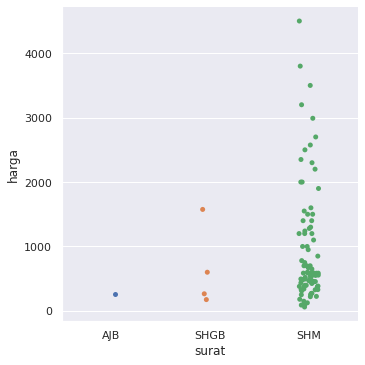

In [ ]:
p= sns.catplot(x="surat", y="harga", data=lampung2)

terdapat kecenderungan perbedaan harga rumah akibat surat rumah, dimana rumah yang memiliki surat SHM lebih tinggi dibandingkan tipe surat yang lainnya

# Apakah ada kecenderungan perbedaan harga rumah akibat dari luas tanah dan luas bangunan?

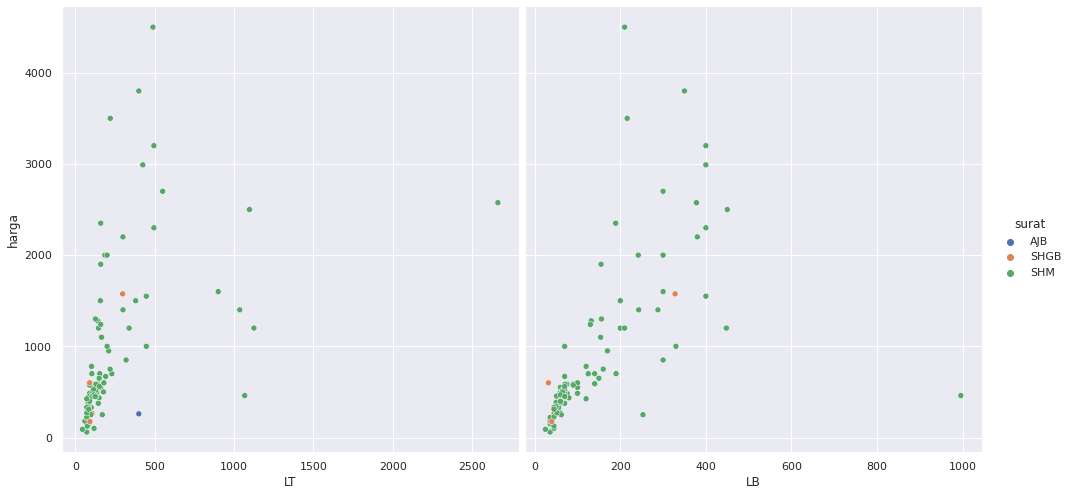

In [ ]:
p = sns.pairplot(lampung2, x_vars =['LT', 'LB'], y_vars = ['harga'], hue="surat", height= 7)

Dilihat dari grafik di atas terlihat tidak adanya kecenderungan harga rumah yang dipengaruhi oleh luas tanah. Sedangkan luas bangunan mempengaruhi harga rumah .

# Apakah ada kecenderungan perbedaan harga rumah akibat dari jumlah kamar tidur dan kamar mandi?

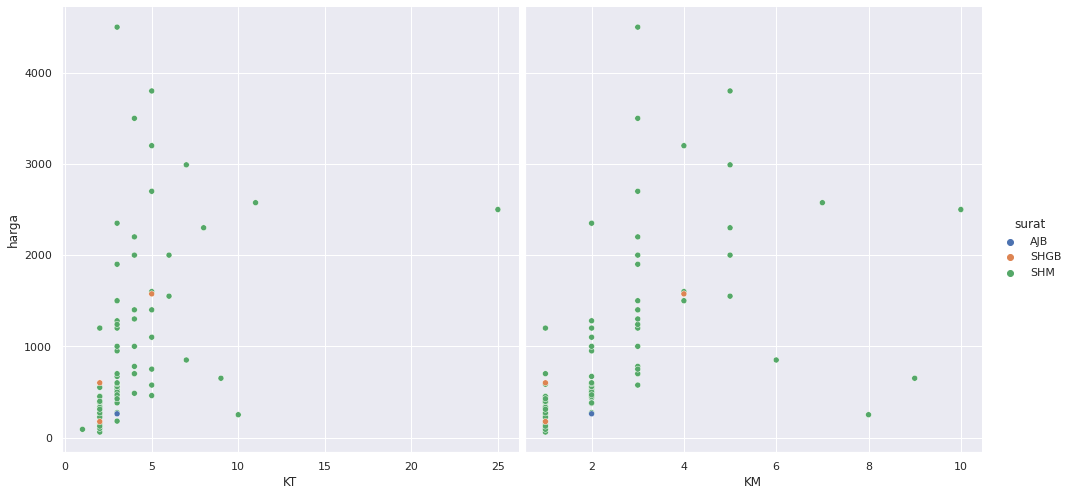

In [ ]:
p = sns.pairplot(lampung2, x_vars =['KT', 'KM'], y_vars = ['harga'], hue="surat", height= 7)

Terdapat kecenderungan perbedaan harga rumah. Namun pada beberapa data, terdapat rumah yang harganya tinggi dengan memiliki jumlah kamar tidur dan kamar mandi yang tidak sebanding.

# Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe parkir?

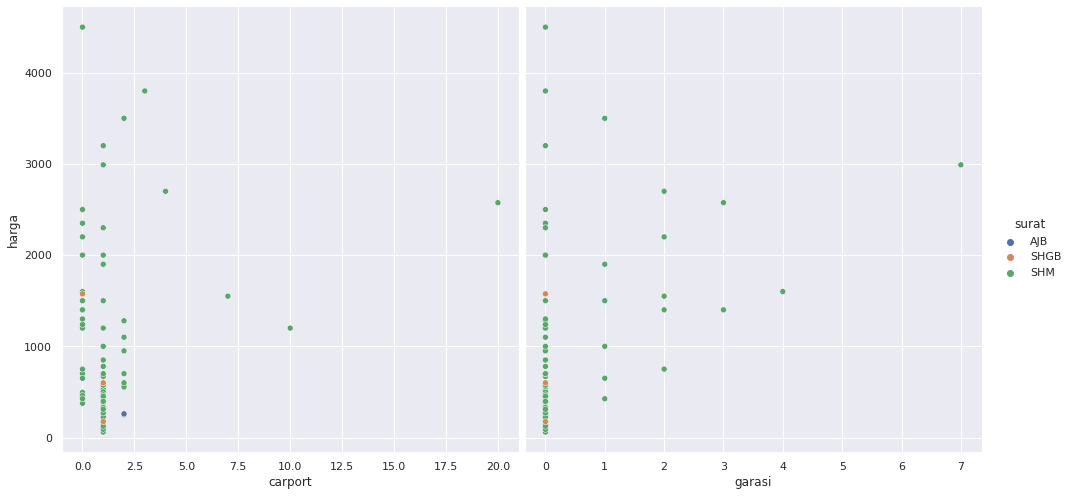

In [ ]:
p = sns.pairplot(lampung2, x_vars =['carport', 'garasi'], y_vars = ['harga'], hue="surat", height= 7)

Berdasarkan grafik di atas, rumah yang dijual di Lampung rata-rata memiliki 1 carport dan tidak memiliki garasi. Dapat dilihat juga bahwa carport dan garasi tidak memengaruhi harga rumah.

# Apakah ada kecenderungan perbedaan harga rumah akibat dari listrik?

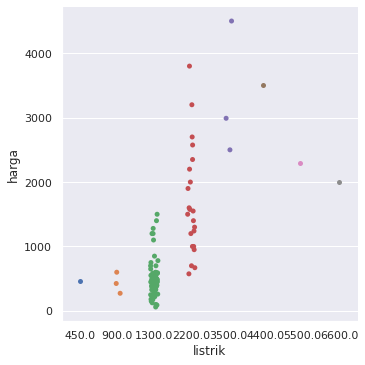

In [ ]:
p= sns.catplot(x="listrik", y="harga", data=lampung2)

Terlihat adanya kecenderungan perbedaan harga rumah berdasarkan besarnya daya listrik.

# Cek Korelasi

In [ ]:
lampung2.corr()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
harga,1.000000,0.458348,0.567454,0.414423,0.526480,0.259629,0.322188,0.196382,0.405315,0.683884
LT,0.458348,1.000000,0.642251,0.537397,0.484970,0.022056,0.031594,0.709020,0.423173,0.221071
LB,0.567454,0.642251,1.000000,0.519168,0.544913,0.138431,0.166973,0.222014,0.372623,0.375791
KT,0.414423,0.537397,0.519168,1.000000,0.862487,-0.034846,0.003877,0.191824,0.255390,0.408816
KM,0.526480,0.484970,0.544913,0.862487,1.000000,0.079681,0.059032,0.202097,0.341088,0.468375
KTP,0.259629,0.022056,0.138431,-0.034846,0.079681,1.000000,0.707460,-0.126072,0.011334,0.252514
KMP,0.322188,0.031594,0.166973,0.003877,0.059032,0.707460,1.000000,-0.079252,0.053674,0.360365
carport,0.196382,0.709020,0.222014,0.191824,0.202097,-0.126072,-0.079252,1.000000,0.225446,0.013587
garasi,0.405315,0.423173,0.372623,0.255390,0.341088,0.011334,0.053674,0.225446,1.000000,0.261173
listrik,0.683884,0.221071,0.375791,0.408816,0.468375,0.252514,0.360365,0.013587,0.261173,1.000000


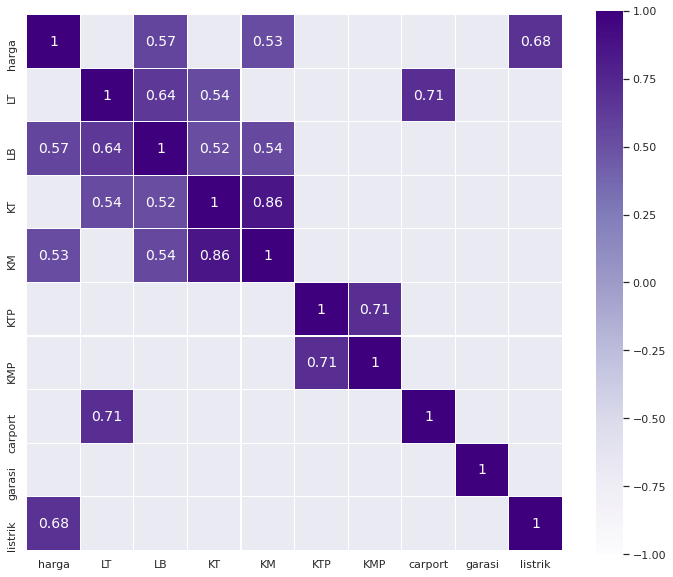

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = lampung2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='Purples', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Kesimpulan

Berdasarkan hasil visualisasi di atas dapat disimpulkan bahwa harga rumah dipengaruhi oleh :
1. Luas bangunan
2. Jumlah kamar tidur
3. Jumlah kamar mandi
4. Listrik

# Clustering

In [ ]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-13 19:47:36--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.1’

tau_unsup.py.1      100%[===================>]  16.98K  --.-KB/s    in 0s      

2021-04-13 19:47:36 (104 MB/s) - ‘tau_unsup.py.1’ saved [17387/17387]



In [ ]:
import umap, tau_unsup as tau
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

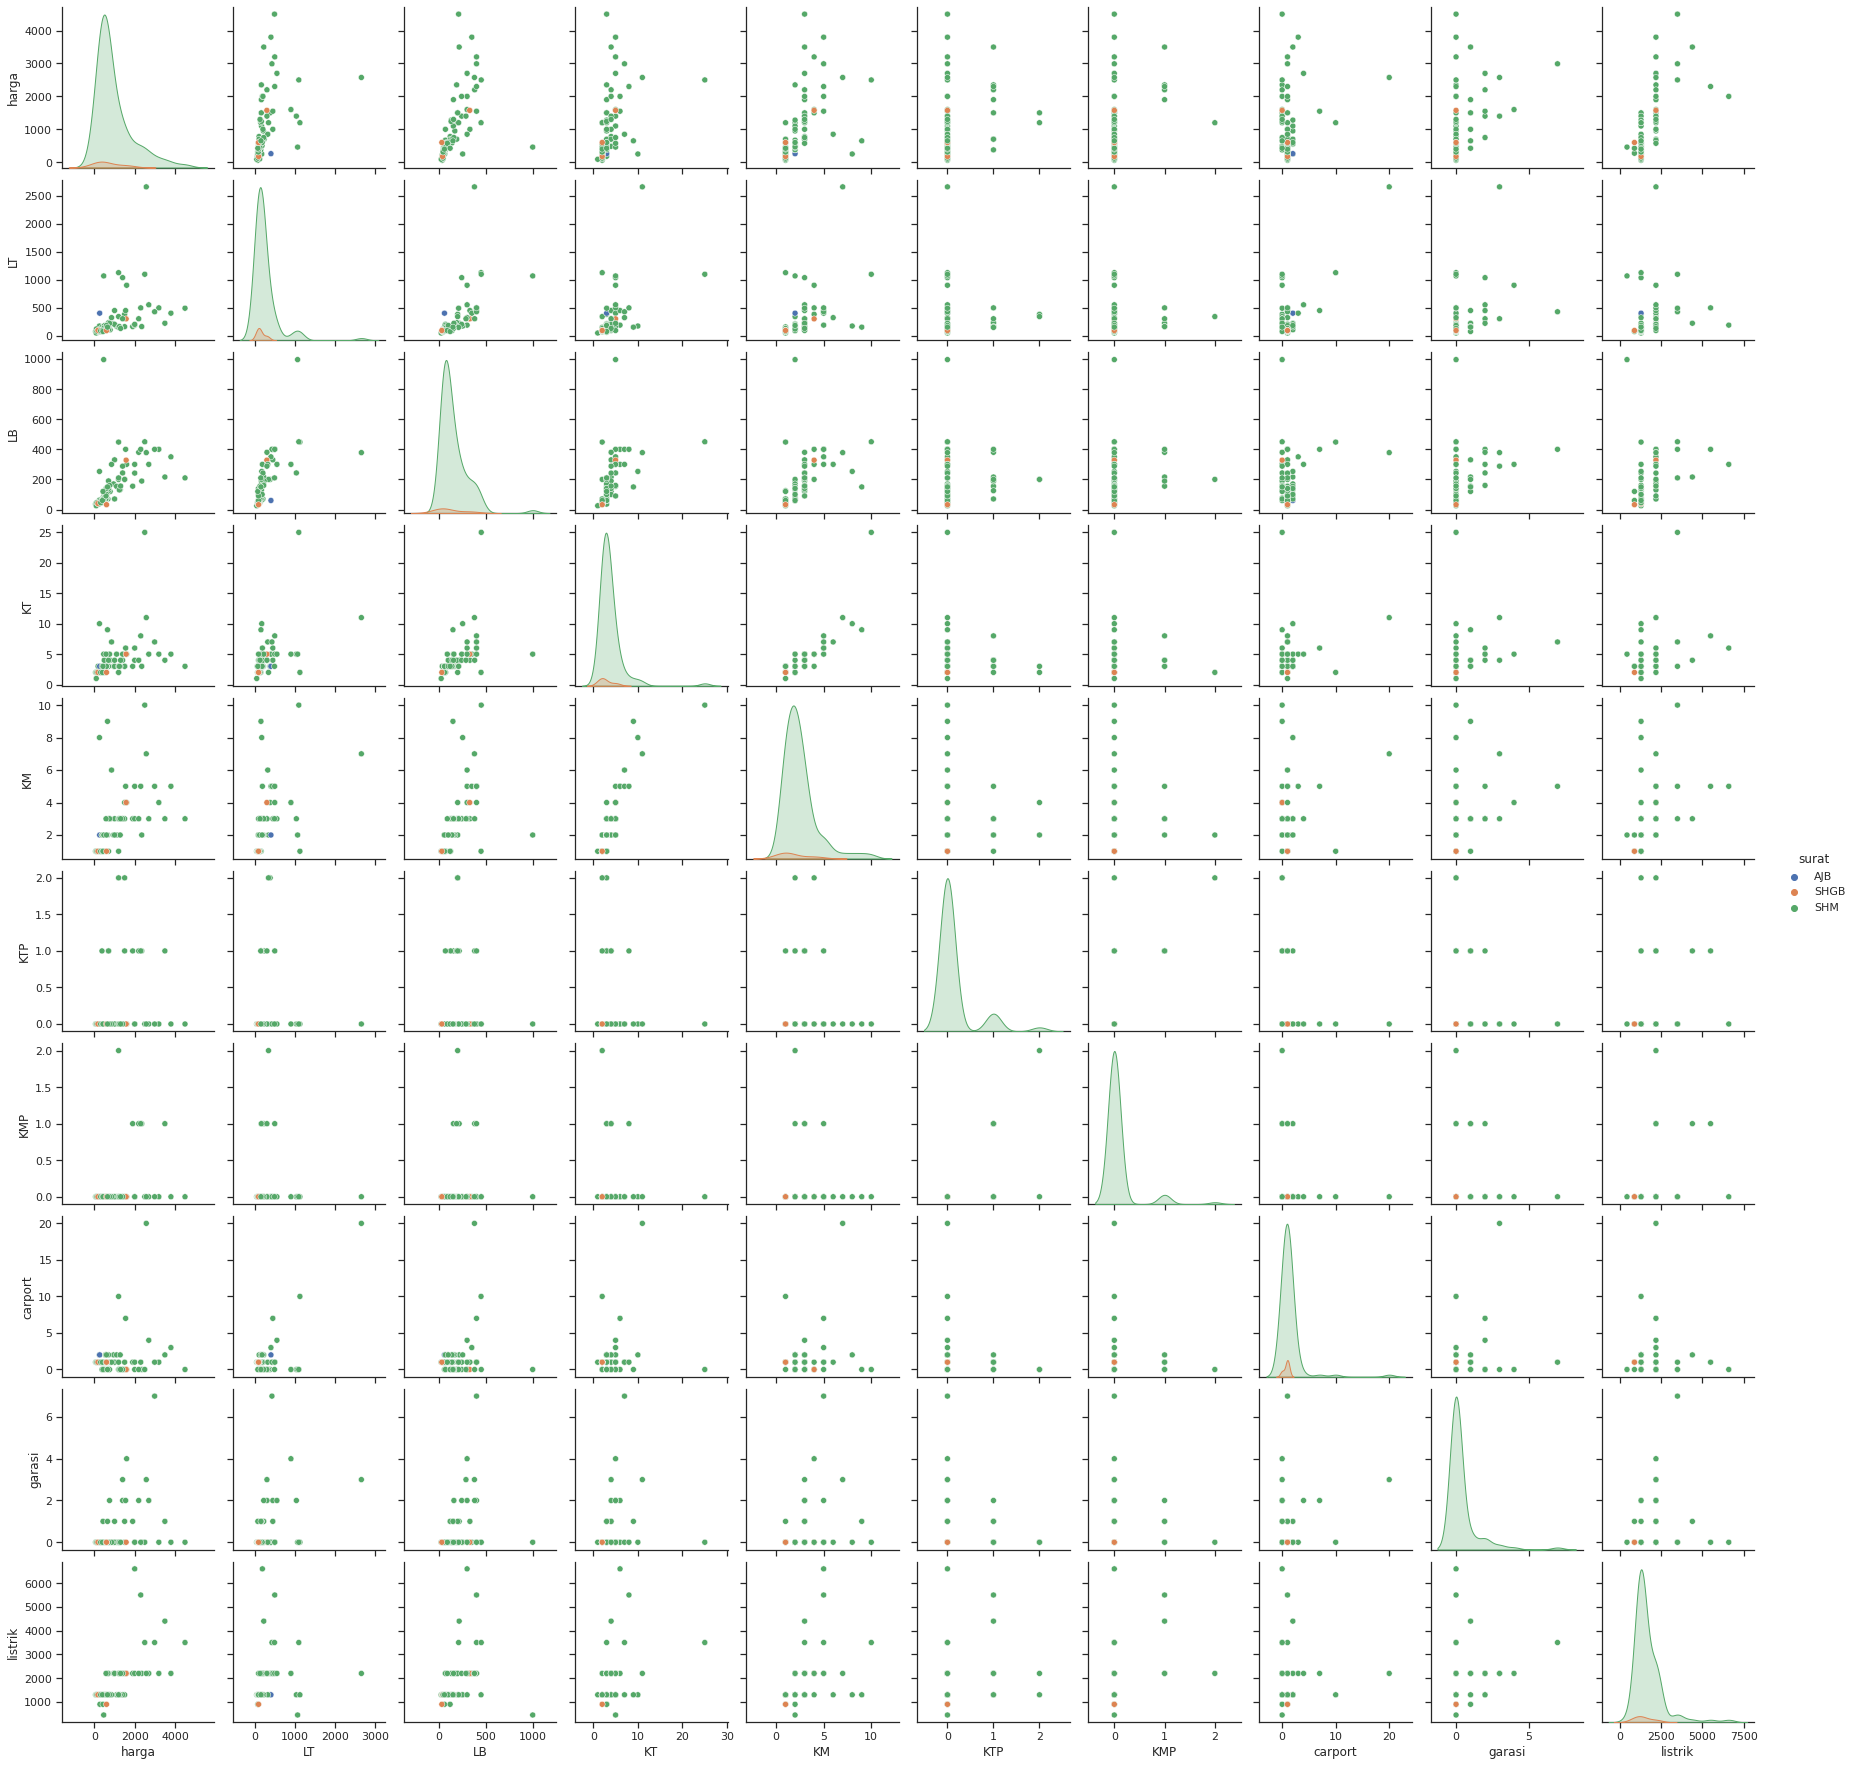

In [ ]:
sns.pairplot(lampung2,hue='surat');

In [ ]:
lampung_num2 = lampung2.select_dtypes(include = ['float64', 'int64'])
lampung_num2.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,3500.0,220,216,4.0,3.0,1,1,2,1,4400.0
1,1500.0,380,200,3.0,4.0,2,0,0,0,1300.0
2,1900.0,160,155,3.0,3.0,1,1,1,1,2200.0
3,2350.0,160,189,3.0,2.0,1,1,0,0,2200.0
4,1400.0,1036,243,5.0,3.0,0,0,0,2,1300.0


In [ ]:
X = pd.DataFrame(lampung_num2)
X.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,3500.0,220,216,4.0,3.0,1,1,2,1,4400.0
1,1500.0,380,200,3.0,4.0,2,0,0,0,1300.0
2,1900.0,160,155,3.0,3.0,1,1,1,1,2200.0
3,2350.0,160,189,3.0,2.0,1,1,0,0,2200.0
4,1400.0,1036,243,5.0,3.0,0,0,0,2,1300.0


# Mencari nilaik K

# Elbow method



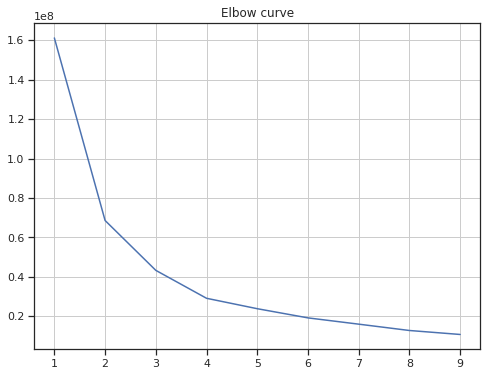

In [ ]:
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

Berdasarkan gambar grafik Elbow method nilai K nya adalah 2 atau 3 atau 4

# Testing K berdasarkan Elbow Method

# K = 2

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1], dtype=int32)

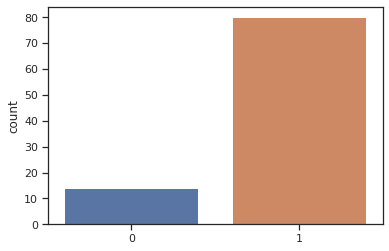

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-2, random_state = 109)
km.fit(X)
C_km = km.predict(X)
p = sns.countplot(C_kmp);
C_km

In [ ]:
km.inertia_

68434028.19104019

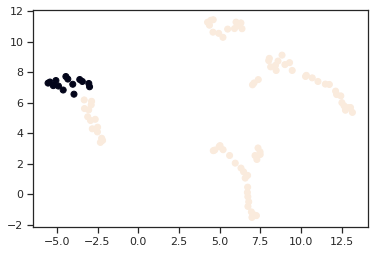

In [ ]:
XD = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=109).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(XD[:,0], XD[:,1], c=C_km)
plt.show()

# K = 3

array([2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1], dtype=int32)

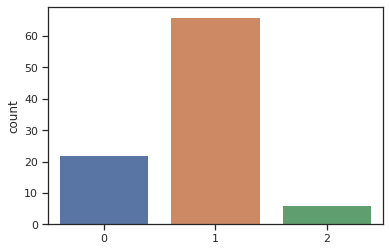

In [ ]:
km1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-2, random_state = 109)
km1.fit(X)
C_km1 = km1.predict(X)
sns.countplot(C_km1);
C_km1

In [ ]:
km1.inertia_

43329328.42973485

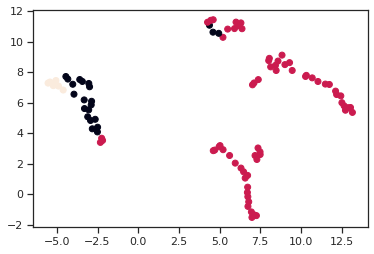

In [ ]:
X1D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=109).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X1D[:,0], X1D[:,1], c=C_km1)
plt.show()

# K = 4

array([2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 1, 1, 1], dtype=int32)

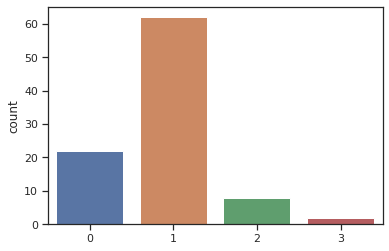

In [ ]:
km2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-2, random_state = 109)
km2.fit(X)
C_km2 = km2.predict(X)
sns.countplot(C_km2);
C_km2

In [ ]:
km2.inertia_

29173344.647034455

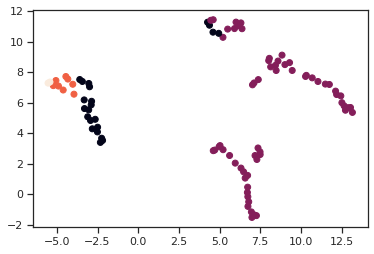

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=109).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km2)
plt.show()

In [ ]:
#Evaluasi : Internal
Hasil_Clustering = [C_km, C_km1, C_km2]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')

0.6862035332222759, 0.6105573719083032, 0.6087422450094537, 

Berdasarkan hasil testing di atas, nilai K yang dipilih untuk clustering adalah K = 4. Hal tersebut karena pada K = 4 memiliki inertia lebih minimum  dibanding K = 2 dan K = 3.

In [ ]:
km2.cluster_centers_

array([[1.36772727e+03, 3.45409091e+02, 2.23227273e+02, 3.68181818e+00,
        2.86363636e+00, 4.09090909e-01, 2.27272727e-01, 1.27272727e+00,
        7.27272727e-01, 2.03636364e+03],
       [4.54160484e+02, 1.34838710e+02, 9.59193548e+01, 2.98387097e+00,
        1.88709677e+00, 3.22580645e-02, 8.32667268e-17, 1.03225806e+00,
        6.45161290e-02, 1.26693548e+03],
       [3.22062500e+03, 7.92250000e+02, 3.38000000e+02, 8.12500000e+00,
        5.00000000e+00, 1.25000000e-01, 1.25000000e-01, 3.87500000e+00,
        1.62500000e+00, 2.96250000e+03],
       [2.15000000e+03, 3.40500000e+02, 3.50000000e+02, 7.00000000e+00,
        5.00000000e+00, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        0.00000000e+00, 6.05000000e+03]])

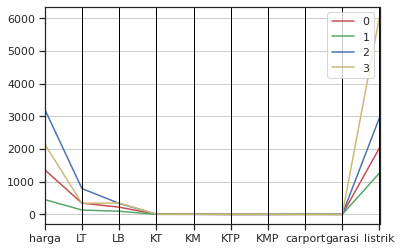

In [ ]:
cols = ['harga','LT','LB','KT','KM','KTP','KMP','carport','garasi','listrik']
dfC = pd.DataFrame(km2.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y'))
plt.show()